In [ ]:
#Import the Libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from warnings import filterwarnings
from wordcloud import WordCloud
filterwarnings('ignore')
from scipy import stats

In [2]:
path = 'user_behavior_dataset.csv'
df = pd.read_csv(path)
df.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User ID,700.0,350.500000,202.216880,1.0,175.75,350.5,525.25,700.0
App Usage Time (min/day),700.0,271.128571,177.199484,30.0,113.25,227.5,434.25,598.0
Screen On Time (hours/day),700.0,5.272714,3.068584,1.0,2.50,4.9,7.40,12.0
Battery Drain (mAh/day),700.0,1525.158571,819.136414,302.0,722.25,1502.5,2229.50,2993.0
Number of Apps Installed,700.0,50.681429,26.943324,10.0,26.00,49.0,74.00,99.0
Data Usage (MB/day),700.0,929.742857,640.451729,102.0,373.00,823.5,1341.00,2497.0
Age,700.0,38.482857,12.012916,18.0,28.00,38.0,49.00,59.0
User Behavior Class,700.0,2.990000,1.401476,1.0,2.00,3.0,4.00,5.0


In [5]:
df.isnull().sum()

,0
User ID,0
Device Model,0
Operating System,0
App Usage Time (min/day),0
Screen On Time (hours/day),0
Battery Drain (mAh/day),0
Number of Apps Installed,0
Data Usage (MB/day),0
Age,0
Gender,0


In [6]:
df.duplicated().sum()

0

In [7]:
df.columns

Index(['User ID', 'Device Model', 'Operating System',
       'App Usage Time (min/day)', 'Screen On Time (hours/day)',
       'Battery Drain (mAh/day)', 'Number of Apps Installed',
       'Data Usage (MB/day)', 'Age', 'Gender', 'User Behavior Class'],
      dtype='object')

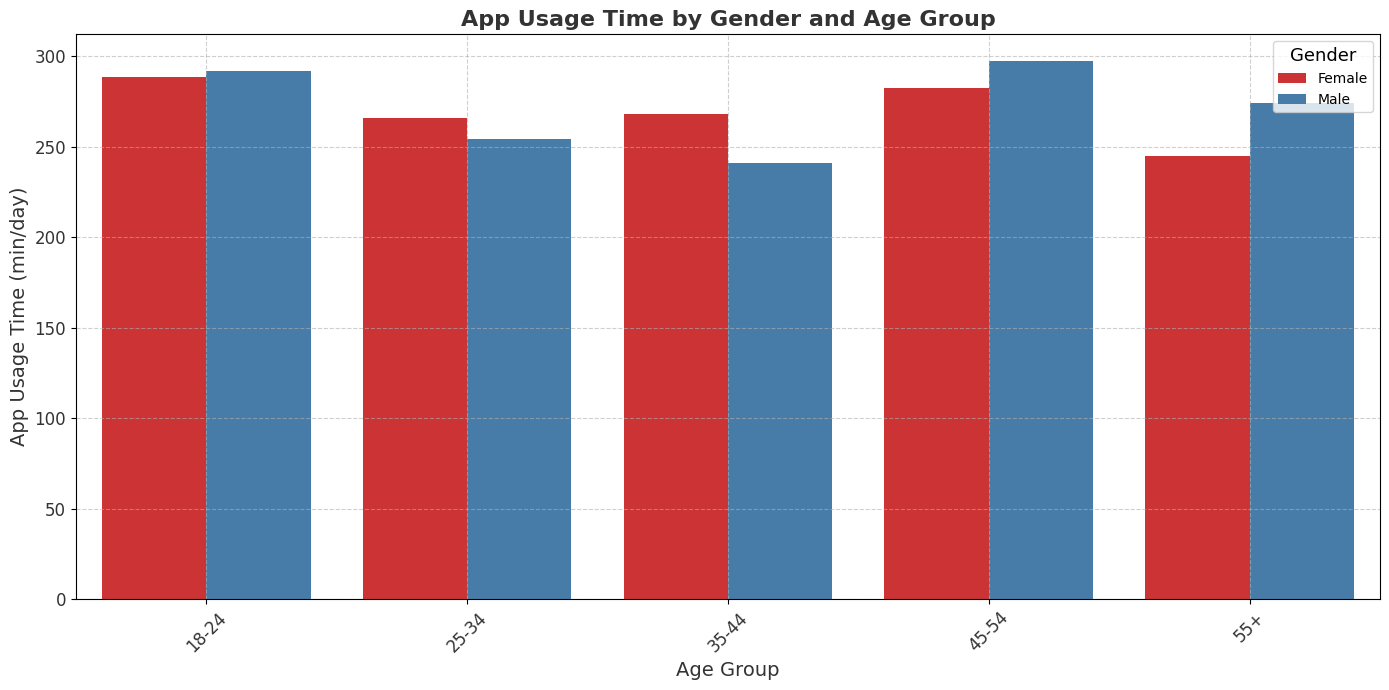

In [8]:
# Create age groups for analysis
bins = [18, 25, 35, 45, 55, 100]
labels = ['18-24', '25-34', '35-44', '45-54', '55+']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Calculate the mean values of app usage and screen-on time based on gender and age groups
age_gender_usage = df.groupby(['Age Group', 'Gender'])[['App Usage Time (min/day)', 'Screen On Time (hours/day)','Data Usage (MB/day)','Number of Apps Installed']].mean().reset_index()

# Visualization: Bar plot of app usage time by gender and age group
plt.figure(figsize=(14, 7))

# Set color palette for gender
sns.barplot(x='Age Group', y='App Usage Time (min/day)', hue='Gender', data=age_gender_usage, palette='Set1')

# Customizing the plot
plt.title('App Usage Time by Gender and Age Group', fontsize=16, fontweight='bold', color='#333')
plt.xlabel('Age Group', fontsize=14, color='#333')
plt.ylabel('App Usage Time (min/day)', fontsize=14, color='#333')
plt.xticks(rotation=45, fontsize=12, color='#333')
plt.yticks(fontsize=12, color='#333')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Gender', title_fontsize='13', loc='upper right')

# Tight layout to avoid overlap
plt.tight_layout()

# Show plot
plt.show()

<Figure size 1200x600 with 0 Axes>

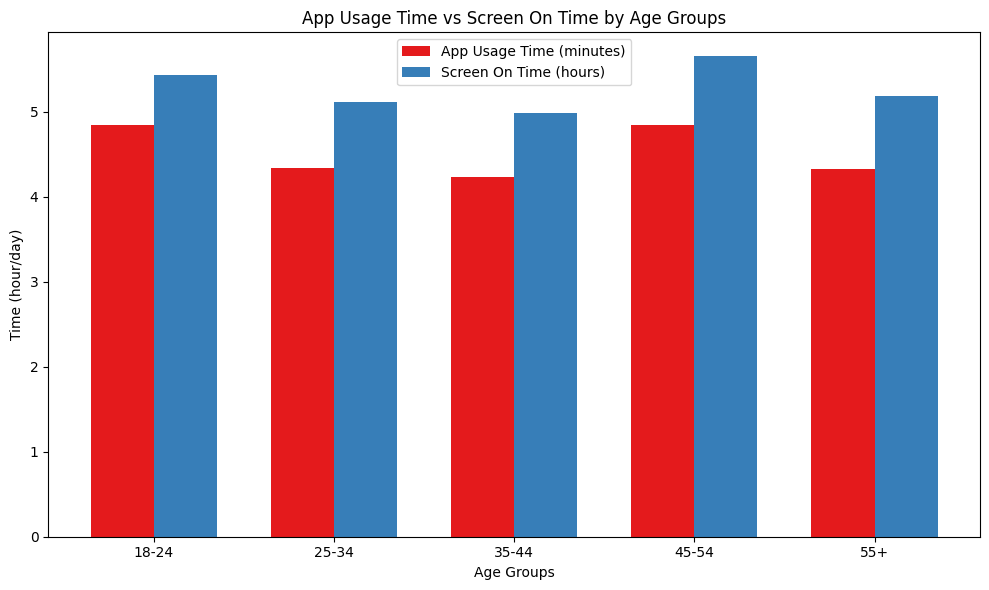

In [9]:
df['app time hour'] = df['App Usage Time (min/day)']/60
df['app time hour'] = df['app time hour'].round(2)
df['app time hour']
#lấy làm tròn
# Create age groups for analysis
bins = [18, 25, 35, 45, 55, 100]
labels = ['18-24', '25-34', '35-44', '45-54', '55+']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

screen = df.groupby(['Age Group'])['Screen On Time (hours/day)'].mean()
screen = screen.round(2)
app_use = df.groupby(['Age Group'])['app time hour'].mean()
app_use = app_use.round(2)
plt.figure(figsize=(12, 6))
#vẽ biểu đồ cột ghép từ 2 dữ liệu trên

# Đặt vị trí các nhóm trên trục x
x = np.arange(len(labels))
palette = sns.color_palette("Set1", len(x))
# Vẽ biểu đồ cột ghép
width = 0.35  # Độ rộng của mỗi cột
fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, app_use, width, label='App Usage Time (minutes)', color = palette[0] )
bars2 = ax.bar(x + width/2, screen, width, label='Screen On Time (hours)', color = palette[1])
# Gắn nhãn và tiêu đề
ax.set_xlabel('Age Groups')
ax.set_ylabel('Time (hour/day)')
ax.set_title('App Usage Time vs Screen On Time by Age Groups')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.tight_layout()
plt.show()

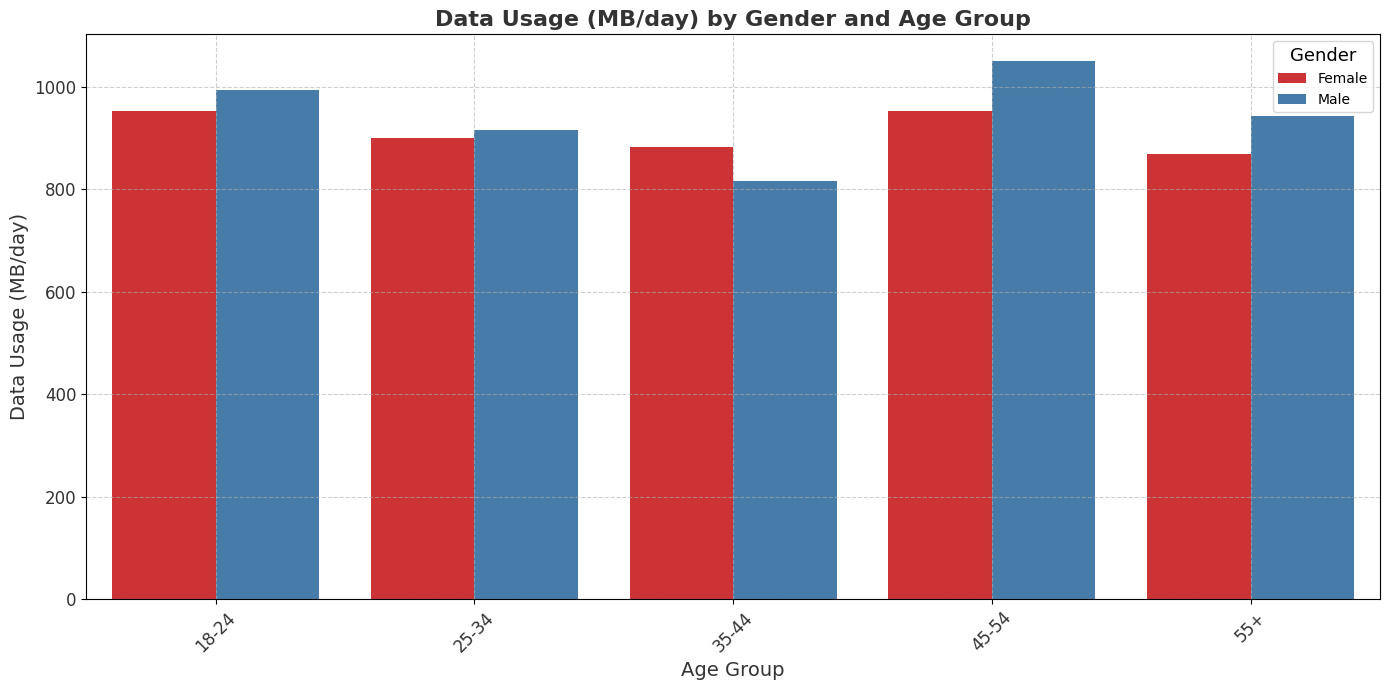

In [10]:
plt.figure(figsize=(14, 7))

# Set color palette for gender
sns.barplot(x='Age Group', y='Data Usage (MB/day)', hue='Gender', data=age_gender_usage, palette='Set1')

# Customizing the plot
plt.title('Data Usage (MB/day) by Gender and Age Group', fontsize=16, fontweight='bold', color='#333')
plt.xlabel('Age Group', fontsize=14, color='#333')
plt.ylabel('Data Usage (MB/day)', fontsize=14, color='#333')
plt.xticks(rotation=45, fontsize=12, color='#333')
plt.yticks(fontsize=12, color='#333')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Gender', title_fontsize='13', loc='upper right')

# Tight layout to avoid overlap
plt.tight_layout()

# Show plot
plt.show()

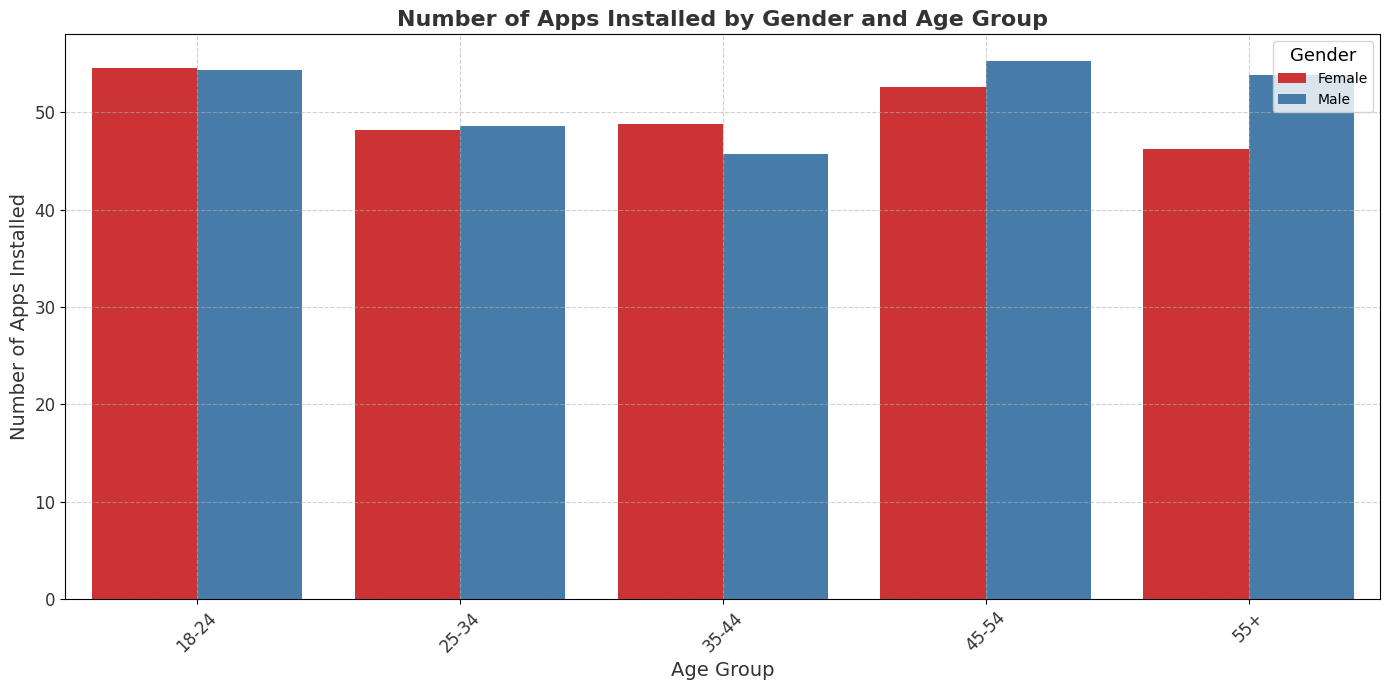

In [11]:
plt.figure(figsize=(14, 7))

# Set color palette for gender
sns.barplot(x='Age Group', y='Number of Apps Installed', hue='Gender', data=age_gender_usage, palette='Set1')

# Customizing the plot
plt.title('Number of Apps Installed by Gender and Age Group', fontsize=16, fontweight='bold', color='#333')
plt.xlabel('Age Group', fontsize=14, color='#333')
plt.ylabel('Number of Apps Installed', fontsize=14, color='#333')
plt.xticks(rotation=45, fontsize=12, color='#333')
plt.yticks(fontsize=12, color='#333')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Gender', title_fontsize='13', loc='upper right')

# Tight layout to avoid overlap_
plt.tight_layout()

# Show plot
plt.show()

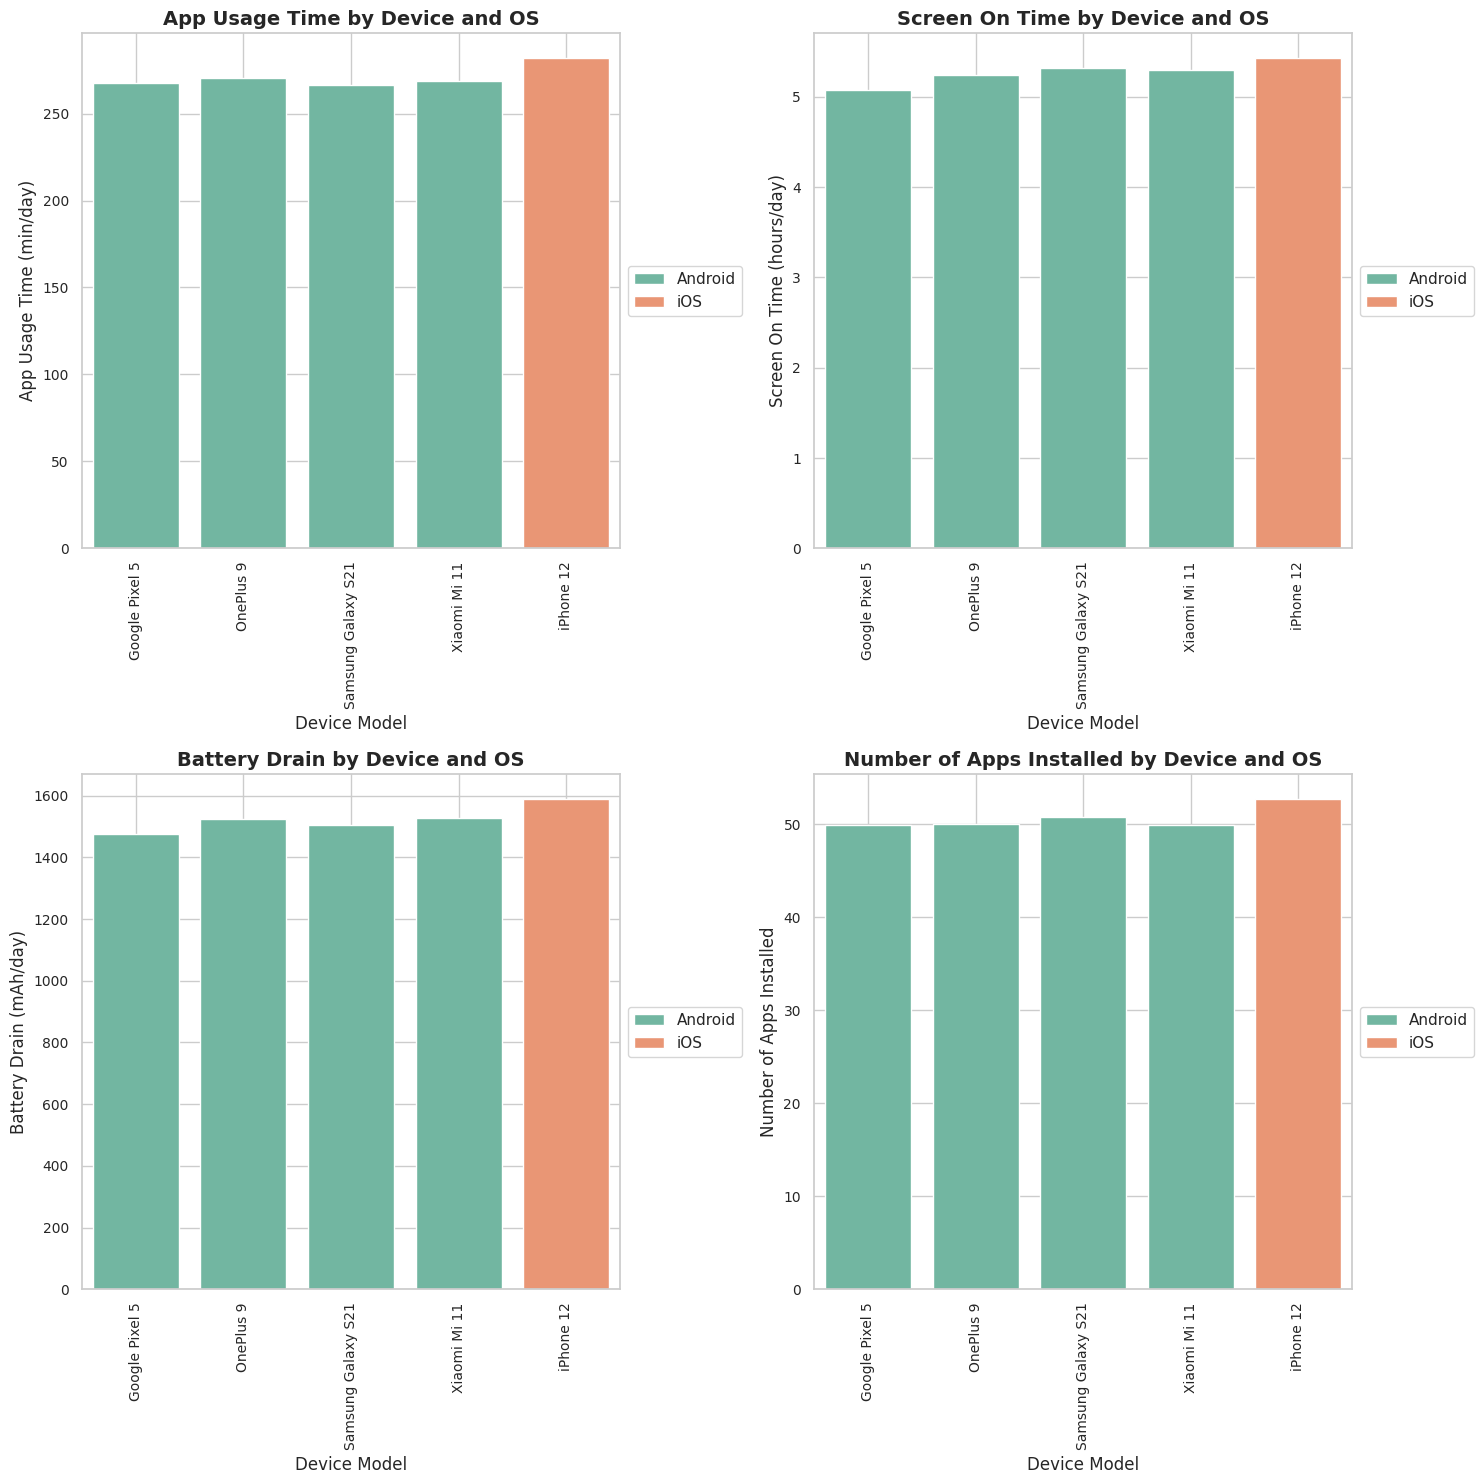

In [12]:
# Set Seaborn theme for a polished look
sns.set_theme(style="whitegrid")

# Group by Device Model and Operating System to calculate mean values of key metrics
device_os_usage = df.groupby(['Device Model', 'Operating System'])[['App Usage Time (min/day)', 'Screen On Time (hours/day)', 'Battery Drain (mAh/day)','Number of Apps Installed']].mean().reset_index()

# Create a figure with a larger, custom aspect ratio
plt.figure(figsize=(15, 15))

# App Usage Time by Device and OS
plt.subplot(2,2 , 1)
sns.barplot(x='Device Model', y='App Usage Time (min/day)', hue='Operating System', data=device_os_usage, palette="Set2")
plt.title('App Usage Time by Device and OS', fontsize=14, fontweight='bold')
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Device Model', fontsize=12)
plt.ylabel('App Usage Time (min/day)', fontsize=12)
plt.grid(True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Legend on the right

# Screen On Time by Device and OS
plt.subplot(2, 2, 2)
sns.barplot(x='Device Model', y='Screen On Time (hours/day)', hue='Operating System', data=device_os_usage, palette="Set2")
plt.title('Screen On Time by Device and OS', fontsize=14, fontweight='bold')
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Device Model', fontsize=12)
plt.ylabel('Screen On Time (hours/day)', fontsize=12)
plt.grid(True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Legend on the right

# Battery Drain by Device and OS
plt.subplot(2, 2, 3)
sns.barplot(x='Device Model', y='Battery Drain (mAh/day)', hue='Operating System', data=device_os_usage, palette="Set2")
plt.title('Battery Drain by Device and OS', fontsize=14, fontweight='bold')
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Device Model', fontsize=12)
plt.ylabel('Battery Drain (mAh/day)', fontsize=12)
plt.grid(True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Legend on the right

plt.subplot(2, 2, 4)
sns.barplot(x='Device Model', y='Number of Apps Installed', hue='Operating System', data=device_os_usage, palette="Set2")
plt.title('Number of Apps Installed by Device and OS', fontsize=14, fontweight='bold')
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Device Model', fontsize=12)
plt.ylabel('Number of Apps Installed', fontsize=12)
plt.grid(True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Legend on the right
# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

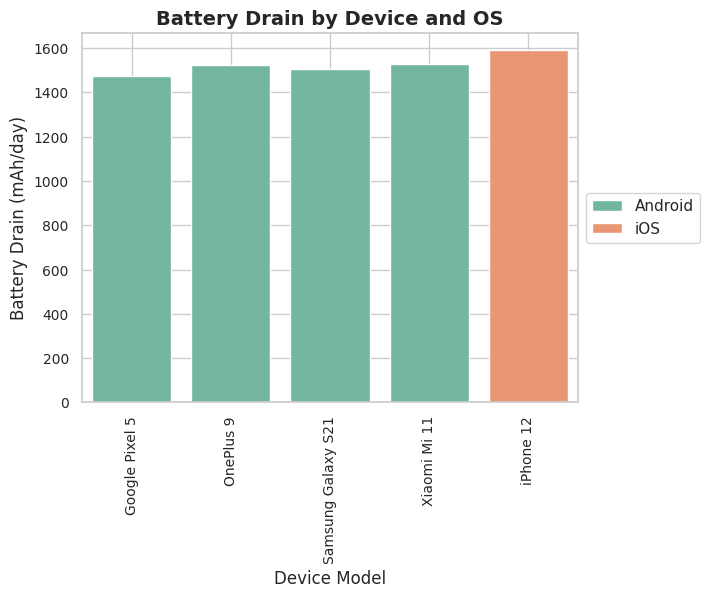

In [13]:
# Battery Drain by Device and OS
plt.subplot(1, 1, 1)
sns.barplot(x='Device Model', y='Battery Drain (mAh/day)', hue='Operating System', data=device_os_usage, palette="Set2")
plt.title('Battery Drain by Device and OS', fontsize=14, fontweight='bold')
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Device Model', fontsize=12)
plt.ylabel('Battery Drain (mAh/day)', fontsize=12)
plt.grid(True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Legend on the right